In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load car evaluation dataset
data = pd.read_csv("C:/Desktop Dummy/ml practicals/car_evaluation.csv")


In [7]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
data.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [13]:
data.dtypes

vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object

In [15]:
data.shape

(1727, 7)

In [23]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [25]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [27]:
data.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [31]:
print(data.columns.tolist())

['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']


In [33]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum(), "\n")

Missing Values:
 vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64 



In [37]:
# Data Preprocessing
# ============================================================
# Encode all categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)

In [39]:
# Display encoded dataset
print("Encoded Dataset Sample:\n", data.head(), "\n")


Encoded Dataset Sample:
    vhigh  vhigh.1  2  2.1  small  low  unacc
0      3        3  0    0      2    2      2
1      3        3  0    0      2    0      2
2      3        3  0    0      1    1      2
3      3        3  0    0      1    2      2
4      3        3  0    0      1    0      2 



In [45]:
# Define Features and Target Variable
# ============================================================
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]  # Independent variables (all except last)
y = data.iloc[:, -1]   # Target variable (last column)

In [47]:
# Split dataset into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [51]:
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}\n")


Training Samples: 1381
Testing Samples: 346



In [55]:
# Create a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [57]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [69]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.9624277456647399


In [71]:
print("\nConfusion Matrix:\n", confusion)


Confusion Matrix:
 [[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]


In [73]:
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



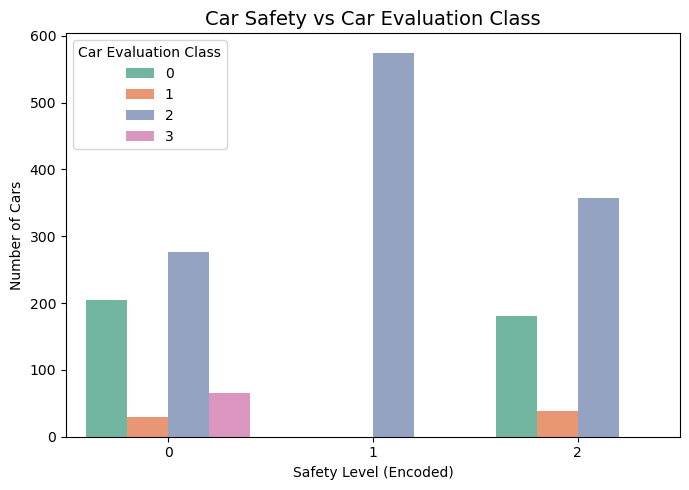

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(x='low', hue='unacc', data=data, palette='Set2')
plt.title("Car Safety vs Car Evaluation Class", fontsize=14)
plt.xlabel("Safety Level (Encoded)")
plt.ylabel("Number of Cars")
plt.legend(title='Car Evaluation Class', loc='upper left')
plt.tight_layout()
plt.show()


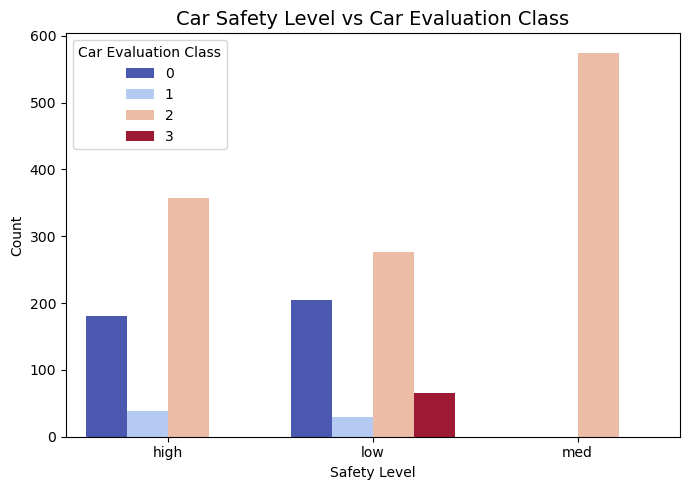

In [81]:
# Mapping encoded safety levels back to labels
safety_map = {0: 'low', 1: 'med', 2: 'high'}
data['low'] = data['low'].map(safety_map)

# Then plot again
plt.figure(figsize=(7,5))
sns.countplot(x='low', hue='unacc', data=data, palette='coolwarm')
plt.title("Car Safety Level vs Car Evaluation Class", fontsize=14)
plt.xlabel("Safety Level")
plt.ylabel("Count")
plt.legend(title='Car Evaluation Class', loc='upper left')
plt.tight_layout()
plt.show()
